### This is a file for the machine learning analysis of an example dataset
The analysis is available at [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

There are 3 data sets included:
* **diabetes _ 012 _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
* **diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
* **diabetes _ binary _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

We are going to use the second dataset for simplicity.

In [1]:
# Import the necessary packages

# preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns

In [2]:
# Read in the data
datapath = "../data/train/diabetes_binary_train.csv.zip"
data_in = pd.read_csv(datapath, compression="zip")
data_in.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,10.0,1.0,1.0,5.0,4.0,5.0
1,1.0,1.0,1.0,1.0,41.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0
2,0.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,30.0,15.0,1.0,0.0,10.0,4.0,1.0
3,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,6.0,8.0
4,1.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,10.0,10.0,1.0,0.0,8.0,4.0,8.0


In [3]:
data_in.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
# Select a subset of the data to work with
data_first_subset = data_in[[
    "Diabetes_binary",
    "AnyHealthcare",
    "Age",
    "Sex"]]
data_first_subset.head()

,Diabetes_binary,AnyHealthcare,Age,Sex
0,1.0,1.0,5.0,1.0
1,1.0,1.0,10.0,0.0
2,0.0,1.0,10.0,0.0
3,0.0,1.0,2.0,0.0
4,1.0,1.0,8.0,0.0


In [5]:
# Split the predictors and the outcome
y = data_first_subset[["Diabetes_binary"]]
X = data_first_subset.drop("Diabetes_binary", axis=1)

In [6]:
# Separate the data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2)

In [7]:
print(f"The shape of the predictors (data) is: {X.shape}")
print(f"The shape of the training predictor set is: {X_train.shape}")
print(f"The shape of the test predictor set is: {X_valid.shape}")
print(f"The shape of the outcome set is: {y.shape}")
print(f"The shape of the training outcome set is: {y_train.shape}")
print(f"The shape of the test outcome set is: {y_valid.shape}")

The shape of the predictors (data) is: (56553, 3)
The shape of the training predictor set is: (45242, 3)
The shape of the test predictor set is: (11311, 3)
The shape of the outcome set is: (56553, 1)
The shape of the training outcome set is: (45242, 1)
The shape of the test outcome set is: (11311, 1)


In [8]:
# Predict using logistic regression
logit_model = LogisticRegression(penalty="l2")
logit_model.fit(X_train, y_train.values.ravel())
y_pred = logit_model.predict(X_train)


A simple way to check the model performance is by confusion matrix that shows the percentage of True Positives, True Negatives, False Positives, and False Negatives.

We can also get a single number evaluation score, eg accuracy, that can be used here as the dataset is balanced.
Accuracy is defined as 

$accuracy(y,\hat y) = \frac{\sum_{i=0}^{n-1} 1\ iff (\hat y_i = y_i)}{n}$

where n is the number of samples

The accuracy on the validation data is 0.61


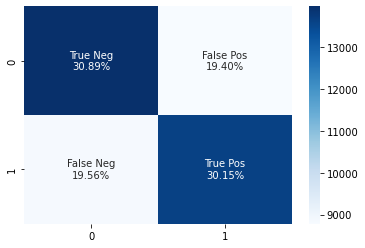

In [9]:
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)
# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
acc = accuracy_score(y_train.values.ravel(), y_pred)
print(f"The accuracy on the validation data is {acc:.2f}")

The accuracy on the validation data is 0.62


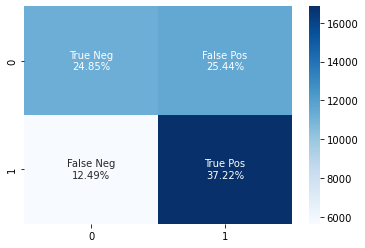

In [10]:
# Predict using decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train.values.ravel())
y_pred = dt_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
acc = accuracy_score(y_train.values.ravel(), y_pred)
print(f"The accuracy on the validation data is {acc:.2f}")

The accuracy on the validation data is 0.62


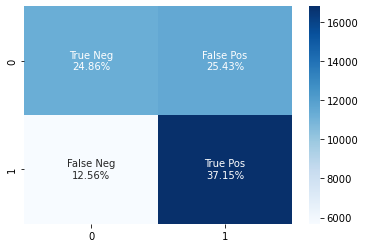

In [11]:
# Predict using SVM
svm_model = SVC(
    kernel = "linear")
svm_model.fit(X_train, y_train.values.ravel())
y_pred = svm_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
acc = accuracy_score(y_train.values.ravel(), y_pred)
print(f"The accuracy on the validation data is {acc:.2f}")

We can add more variables to improve the model.

In [12]:
# Select a subset of the data to work with
data_subset = data_in[[
    "Diabetes_binary",
    "Age",
    "Sex",
    "Education",
    "HighBP",
    "HighChol",
    "PhysActivity"]]
print(data_subset.head())
# Split the predictors and the outcome
y = data_subset[["Diabetes_binary"]]
X = data_subset.drop("Diabetes_binary", axis=1)
# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2)


   Diabetes_binary   Age  Sex  Education  HighBP  HighChol  PhysActivity
0              1.0   5.0  1.0        4.0     1.0       1.0           0.0
1              1.0  10.0  0.0        2.0     1.0       1.0           1.0
2              0.0  10.0  0.0        4.0     1.0       1.0           1.0
3              0.0   2.0  0.0        6.0     0.0       0.0           1.0
4              1.0   8.0  0.0        4.0     1.0       1.0           0.0


The accuracy on the validation data is 0.69


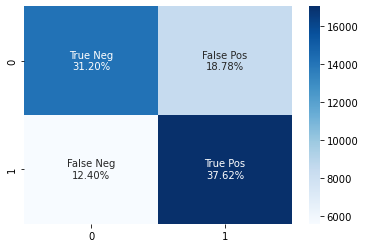

In [13]:
# Predict using SVM
svm_model = SVC(
    kernel = "linear")
svm_model.fit(X_train, y_train.values.ravel())
y_pred = svm_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
acc = accuracy_score(y_train.values.ravel(), y_pred)
print(f"The accuracy on the validation data is {acc:.2f}")

We can also try fine tuning the parameters

The accuracy on the validation data is 0.70


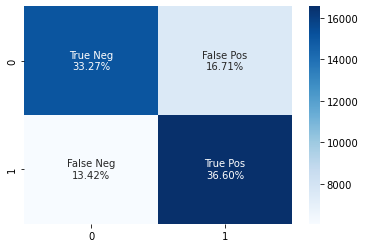

In [14]:
# Predict using SVM
svm_model = SVC(
    kernel = "poly",
    degree=5
    )# giving more freedom to the model
svm_model.fit(X_train, y_train.values.ravel())
y_pred = svm_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
acc = accuracy_score(y_train.values.ravel(), y_pred)
print(f"The accuracy on the validation data is {acc:.2f}")

So far, we only checked how much the model learnt. We should also check how well the model predicts unseen data

The accuracy on the validation data is 0.70


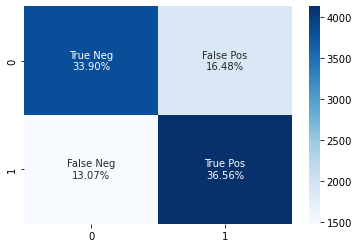

In [15]:
# Predict using SVM
svm_model = SVC(
    kernel = "poly",
    degree=5
    )# giving more freedom to the model
svm_model.fit(X_train, y_train.values.ravel())
# we are providing unseed input here
y_pred = svm_model.predict(X_valid)
# comparing unseen predictions to ground truth
cf_matrix = confusion_matrix(y_valid.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
acc = accuracy_score(y_valid.values.ravel(), y_pred)
print(f"The accuracy on the validation data is {acc:.2f}")

The model predicts unseen data quite well